فراخوانی کتابخانه های لازم

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

installing and adding shap

In [ ]:
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


ایمپورت داده ها و نمایش اندازه آن ها

In [ ]:
# importing the dataset

train = pd.read_csv('/content/drive/MyDrive/HW3/sales_train.csv', parse_dates = ['date'], infer_datetime_format = True, dayfirst = True)
test = pd.read_csv('/content/drive/MyDrive/HW3/test.csv')
shops = pd.read_csv('/content/drive/MyDrive/HW3/shops.csv')
items = pd.read_csv('/content/drive/MyDrive/HW3/items.csv')
item_categories = pd.read_csv('/content/drive/MyDrive/HW3/item_categories.csv')

# checking the shapes of these datasets
print("Shape of train:", train.shape)
print("Shape of test:", test.shape)
print("Shape of shops:", shops.shape)
print("Shape of items:", items.shape)
print("Shape of item_categories:", item_categories.shape)

Shape of train: (2935849, 6)
Shape of test: (214200, 3)
Shape of shops: (60, 2)
Shape of items: (22170, 3)
Shape of item_categories: (84, 2)


نمایش داده های مختلف

In [ ]:
# head of training dataset
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [ ]:
# head of test data set
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [ ]:
# sample of shops data set
shops.sample(10)

,shop_name,shop_id
23,"Москва ТК ""Буденовский"" (пав.А2)",23
11,Жуковский ул. Чкалова 39м²,11
5,"Вологда ТРЦ ""Мармелад""",5
36,"Новосибирск ТРЦ ""Галерея Новосибирск""",36
0,"!Якутск Орджоникидзе, 56 фран",0
33,"Мытищи ТРК ""XL-3""",33
3,"Балашиха ТРК ""Октябрь-Киномир""",3
12,Интернет-магазин ЧС,12
44,"Самара ТЦ ""Мелодия""",44
45,"Самара ТЦ ""ПаркХаус""",45


In [ ]:
# head of items dataset
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [ ]:
# checking the head of item_categories dataset
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [ ]:
# describing the training set
train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [ ]:
# getting the information about the data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            datetime64[ns]
 1   date_block_num  int64         
 2   shop_id         int64         
 3   item_id         int64         
 4   item_price      float64       
 5   item_cnt_day    float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 134.4 MB


چک کردن داده های مفقود

In [ ]:
# checking if there is any Null data inside the given data

print("No. of Null values in the train set :", train.isnull().sum().sum())
print("No. of Null values in the test set :", test.isnull().sum().sum())
print("No. of Null values in the item set :", items.isnull().sum().sum())
print("No. of Null values in the shops set :", shops.isnull().sum().sum())
print("No. of Null values in the item_categories set :", item_categories.isnull().sum().sum())

No. of Null values in the train set : 0
No. of Null values in the test set : 0
No. of Null values in the item set : 0
No. of Null values in the shops set : 0
No. of Null values in the item_categories set : 0


مهندسی ویژگی ها و تبدیل بعضی از ویژگی ها

In [ ]:
# feature engineering

# making a new column day
train['day'] = train['date'].dt.day

# making a new column month
train['month'] = train['date'].dt.month

# making a new column year
train['year'] = train['date'].dt.year

# making a new column week
train['week'] = train['date'].dt.isocalendar().week
# making a new column revenue
train['revenue'] = train['item_price'] * train['item_cnt_day']

In [ ]:
# converting the data into monthly sales data

# making a dataset with only monthly sales data
data = train.groupby([train['date'].apply(lambda x: x.strftime('%Y-%m')),'item_id','shop_id']).sum().reset_index()

# specifying the important attributes which we want to add to the data
data = data[['date','item_id','shop_id','item_cnt_day']]

# at last we can select the specific attributes from the dataset which are important
data = data.pivot_table(index=['item_id','shop_id'], columns = 'date', values = 'item_cnt_day', fill_value = 0).reset_index()

# looking at the newly prepared datset
data.shape

(424124, 36)

ادغام داده ها

In [ ]:
# let's merge the monthly sales data prepared to the test data set

test = pd.merge(test, data, on = ['item_id', 'shop_id'], how = 'left')

# filling the empty values found in the dataset
test.fillna(0, inplace = True)

# checking the dataset
test.head()

,ID,shop_id,item_id,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,...,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10
0,0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


جداسازی داده های آموزش و برچسب ها

In [ ]:
# now let's create the actual training data

x_train = test.drop(['2015-10', 'item_id', 'shop_id'], axis = 1)
y_train = test['2015-10']

# deleting the first column so that it can predict the future sales data
x_test = test.drop(['2013-01', 'item_id', 'shop_id'], axis = 1)
y_test = test['2013-01']
# checking the shapes of the datasets
print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)

Shape of x_train : (214200, 34)
Shape of x_test : (214200, 34)


In [ ]:
# let's check the x_train dataset
x_train.head()

,ID,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,...,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# let's check the x_test data

x_test.head()

,ID,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,...,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


جداسازی داده آموزش و ارزیابی

In [ ]:
# splitting the data into train and valid dataset
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.2, random_state = 0)

# checking the shapes
print("Shape of x_train :", x_train.shape)
print("Shape of x_valid :", x_valid.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_valid :", y_valid.shape)

Shape of x_train : (171360, 34)
Shape of x_valid : (42840, 34)
Shape of y_train : (171360,)
Shape of y_valid : (42840,)


مدلسازی رگرسسیون رندوم فارسست

In [ ]:
# MODELING
regr = RandomForestRegressor(max_depth=5,random_state=0)
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

گسسته سازی اعداد

In [ ]:
# Get the test set predictions and clip values to the specified range
y_pred = np.clip(y_pred, 0, 20)

ایجاد دیتافریم تست

In [ ]:
# creating a dataframe with the predicted values
submission = pd.DataFrame({'ID': test.index, 'item_cnt_month': y_pred})
preds = submission['item_cnt_month']

معبارهای ارزیابی

دلیل استفاده از این معیار ها مناسب بودن آن ها برای عمل رگرسیون بوده است و معیار هایی مانند دقت و ... برای این کار مناسب نیستند.

In [ ]:
print('test rmse:', np.sqrt(mean_squared_error(y_test, preds)))
print('test mae:', mean_absolute_error(y_test, preds))
print('test r2:', r2_score(y_test, preds))

test rmse: 1.1706873185748565
test mae: 0.33707803614782494
test r2: -0.28837884440561257


منحنی یادگیری

همانطور که درنمودار دیده میشود یادگیری به خوبی انجام شده است و خطای تست و ترین نزولی بوده است

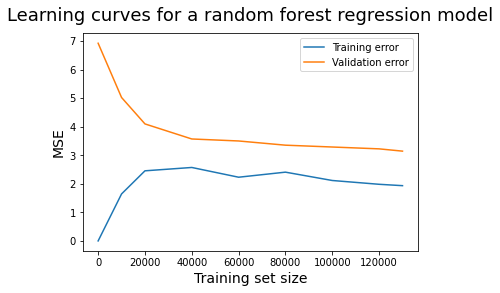

In [ ]:
#learning curve
from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(regr, x_train, y_train, train_sizes =[1,10000,20000,40000,60000,80000,100000,120000,130000], cv = 5, scoring = 'neg_mean_squared_error')
import matplotlib.pyplot as plt
plt.plot(train_sizes, -train_scores.mean(axis = 1), label = 'Training error')
plt.plot(train_sizes, -valid_scores.mean(axis = 1), label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a random forest regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.show()

کتابخانه SHAP

In [ ]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(regr)
# Calculate Shap values
shap_values = explainer.shap_values(x_train)

با توجه به نمودار های مختلف در می یابیم که ویژگی های جدیدتر دارای اهمیت بیشتری اند

این نمودار اهمیت ویژگی های مختلف را نمایش می دهد

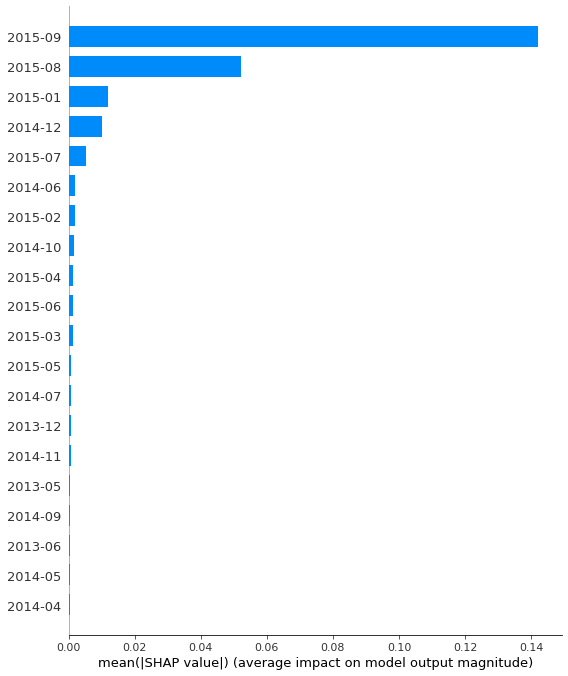

In [ ]:
shap.summary_plot(shap_values, x_train, feature_names=x_train.columns, plot_type="bar")

این نمودار اهمیت ویژگی را با جلوه های ویژگی ترکیب می کندو ویژگی ها با توجه به اهمیت آنها مرتب شده اند

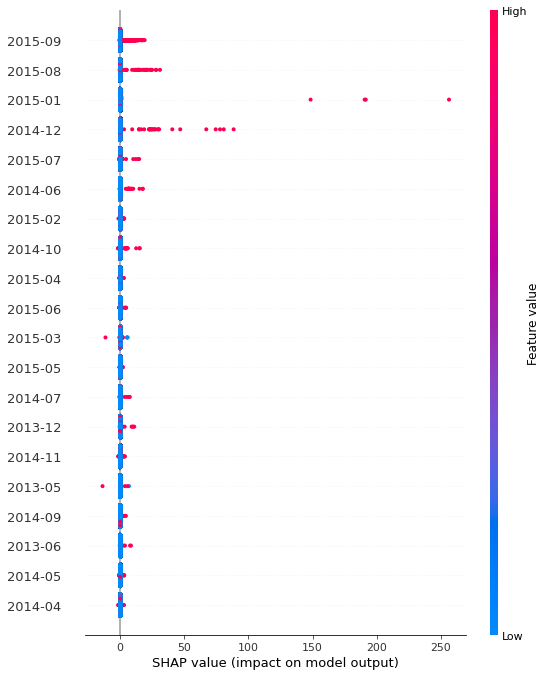

In [ ]:
shap.summary_plot(shap_values, x_train, feature_names=x_train.columns)

در این نمودار خط عمودی خاکستری مقدار پایه است و خط قرمز نشان می دهد که آیا هر ویژگی مقدار خروجی را به مقدار بالاتر یا پایین تر از میانگین پیش بینی منتقل کرده است.

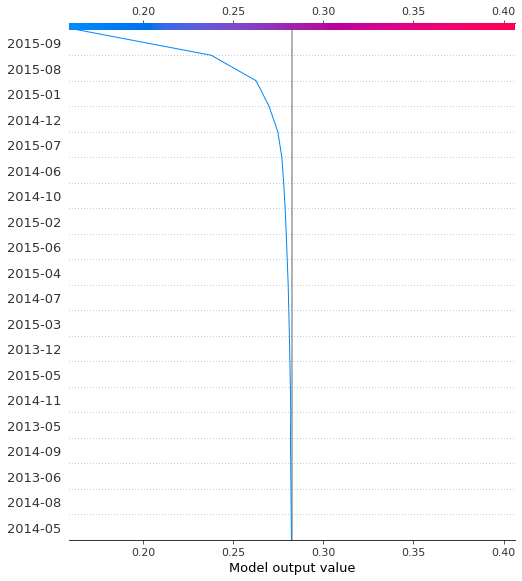

In [ ]:
shap.decision_plot(explainer.expected_value[0], shap_values[0], feature_names = list(x_train.columns))